In [155]:
import os, cv2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import plotting, get_segments

In [6]:
%load_ext autoreload
%autoreload 2

In [2]:
dataset_dir = "./CrowdCount/frames/frames/"

In [3]:
files = os.listdir(dataset_dir)

In [147]:
PREPROCESSING_TITLES = ["Gamma Correction", "Thresholding", "Dilation + Erosion"]

X_SIZE = 80
Y_SIZE = 140

BLOCK_SIZE = 255
C = 11

# Workflow Functions

In [137]:
def gamma_correction(image, gamma = 1.5):
    '''
    Constrast correction using gamma correction
    '''
    
    # Define the gamma value
    gamma = 1.5

    # Create a lookup table for gamma correction
    lookup_table = np.zeros((256,), dtype=np.uint8)
    for i in range(256):
        lookup_table[i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

    # Apply gamma correction using the lookup table
    corrected_img = cv2.LUT(image, lookup_table)

    return corrected_img

In [151]:
def threshold(image):
    '''
    Find adaptive threshold of the image and apply on the image to get important features
    '''
    thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, BLOCK_SIZE, C)
    return thresh

In [139]:
def dilation_erosion(image):
    '''
    Apply Dilation and Erosion technique to improve image texture and smoothness
    '''
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

    dilated = cv2.dilate(image, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # clean all noise after dilatation and erosion
    eroded = cv2.medianBlur(eroded, 5)
    
    return eroded

In [140]:
def count_components(image):
    '''
    Count People in the image using OpenCV in-built functions (connectededComponents)
    '''
    ret, labels = cv2.connectedComponents(image)
    return ret - 1

# Workflow start

In [165]:
image = cv2.imread(os.path.join(dataset_dir, files[0]))

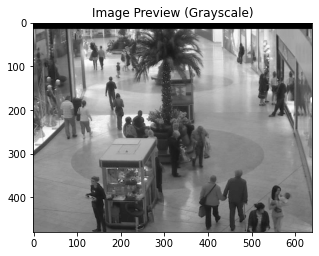

In [166]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plotting(gray, "Image Preview (Grayscale)")

In [167]:
gamma_correct = gamma_correction(gray)
# plotting(gamma_correct, "Gamma Correction")

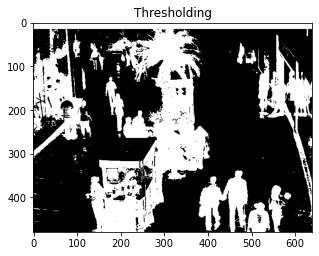

In [168]:
img_threshold = threshold(gamma_correct)
plotting(img_threshold, "Thresholding")

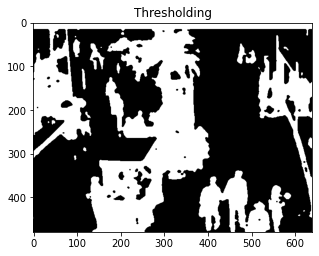

In [169]:
dil_erode = dilation_erosion(img_threshold)
plotting(dil_erode, "Thresholding")

In [170]:
count_components(dil_erode)

30

In [163]:
image_segments = get_segments(gray)
count = 0
for seg in image_segments:
    gamma_correct = gamma_correction(seg)
    img_threshold = threshold(gamma_correct)
    dil_erode = dilation_erosion(img_threshold)
    count += count_components(dil_erode)

print(count)

31


According to the above settings, we are getting the count of objects close to what is mentioned in the labels csv file.
Although this cannot be considered as the correct method since there is no definite way to detect person in this.